In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
from torch.autograd import Variable

from torchvision import transforms, utils, models
import torchvision.transforms.functional as TF

import numpy as np
import glob
import matplotlib.pyplot as plt
import random
import os
import imageio

from PIL import Image

import skimage.external.tifffile as tifffile
import cv2
import glob

import os,sys,inspect
ConvCRF_dir = '../ConvCRF'
sys.path.insert(0,ConvCRF_dir)
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
from backboned_unet import Unet
# 'resnet'- 18, 34, 50, 101, 152
# 'vgg'- 16, 19
# 'densenet' - 121, 161, 169, 201

model1 = Unet(backbone_name='resnet34', classes=2)

upsample_blocks[0] in: 512   out: 256
upsample_blocks[1] in: 256   out: 128
upsample_blocks[2] in: 128   out: 64
upsample_blocks[3] in: 64   out: 32
upsample_blocks[4] in: 32   out: 16


In [5]:
children = list(model1.children())

In [37]:
down_child = list(children[0].children())

In [45]:
model = nn.Sequential(*down_child[:4])

In [46]:
model(torch.randn(1,3,480,480)).shape

torch.Size([1, 64, 120, 120])

In [35]:
model(torch.randn(1,3,480,480))

tensor([[[[1.6572, 0.0782, 0.0359,  ..., 0.0000, 0.0000, 1.0427],
          [0.0000, 0.9733, 0.6305,  ..., 0.1216, 0.1164, 1.3444],
          [0.0000, 1.5613, 0.0000,  ..., 0.4439, 0.0000, 0.1994],
          ...,
          [0.0000, 1.4642, 0.9410,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 3.6794, 0.6369, 0.0000],
          [0.7675, 0.3243, 1.6055,  ..., 0.0000, 0.0000, 1.0467]],

         [[0.3265, 0.4112, 0.6187,  ..., 0.1285, 0.0000, 0.0000],
          [0.8196, 1.0966, 1.1462,  ..., 0.9716, 0.0000, 0.0000],
          [0.7904, 0.8477, 0.8724,  ..., 1.1052, 0.0000, 0.0000],
          ...,
          [0.0000, 0.6370, 0.4061,  ..., 0.6693, 0.1467, 0.0000],
          [0.0000, 0.2418, 0.3759,  ..., 0.2230, 0.3037, 0.1114],
          [0.0000, 0.0000, 0.6872,  ..., 0.0000, 0.2450, 0.4365]],

         [[0.0000, 0.2246, 0.4146,  ..., 1.3109, 0.4706, 0.7371],
          [1.7270, 0.7152, 0.9862,  ..., 1.5389, 2.3656, 1.3302],
          [2.0767, 0.0000, 0.0204,  ..., 1

In [12]:
down_child[0]

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [13]:
down_child[1]

BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [14]:
down_child[2]

ReLU(inplace=True)

In [15]:
down_child[3]

MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)

In [16]:
down_child[4]

Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (2): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, mome

In [18]:
model = nn.Sequential(*down_child[5])

In [21]:
model(torch.randn(1,64,240,240))

tensor([[[[0.8653, 0.6539, 0.0964,  ..., 0.4872, 1.2372, 1.2282],
          [0.1039, 0.5413, 0.2340,  ..., 0.1560, 0.6247, 0.5214],
          [0.3864, 0.4566, 0.3727,  ..., 0.0483, 0.7995, 0.6251],
          ...,
          [0.0000, 0.0068, 0.1379,  ..., 0.0767, 0.4590, 0.3940],
          [0.0000, 0.0000, 0.1337,  ..., 0.0000, 1.0402, 1.3208],
          [0.4773, 1.4976, 0.7598,  ..., 0.6682, 0.7911, 1.4200]],

         [[0.2089, 0.3569, 0.0793,  ..., 0.4777, 0.0222, 0.0295],
          [0.0974, 0.2039, 0.1944,  ..., 0.0303, 0.0685, 0.3288],
          [0.8467, 0.5371, 0.0732,  ..., 0.0539, 0.1029, 0.0193],
          ...,
          [0.5768, 0.0000, 1.5835,  ..., 0.2568, 0.3048, 0.9602],
          [0.2557, 0.2928, 0.0545,  ..., 0.0115, 0.0848, 0.0264],
          [0.2013, 0.6285, 0.2004,  ..., 0.1831, 0.0449, 0.2192]],

         [[0.0000, 0.2047, 0.7586,  ..., 0.2610, 0.2887, 0.4050],
          [0.0000, 0.0000, 0.4728,  ..., 0.0000, 0.4136, 0.1162],
          [0.0000, 0.0000, 0.6460,  ..., 0

In [9]:
children[1]

ModuleList(
  (0): UpsampleBlock(
    (up): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): UpsampleBlock(
    (up): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (2): UpsampleBlock(
    (up): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
  

In [10]:
children[2]

Conv2d(16, 2, kernel_size=(1, 1), stride=(1, 1))

In [2]:
import chart_studio as py

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
image_path = '/home/muzik999/Desktop/IMAGE_FORPAPER/im_rsat2_ar_20120606104418_00092688_l.png'
land_masked_path = '/home/muzik999/MASc/iceFloe/floes/data/images/val/im_rsat2_ar_20120606104418_00092688_l.tif'
floe_mask_path = '/home/muzik999/MASc/iceFloe/floes/data/annotation_masks/im_rsat2_ar_20120606104418_00092688_l.png'

In [4]:
image = plt.imread(image_path)
land_masked = plt.imread(land_masked_path)
floe_mask = plt.imread(floe_mask_path)

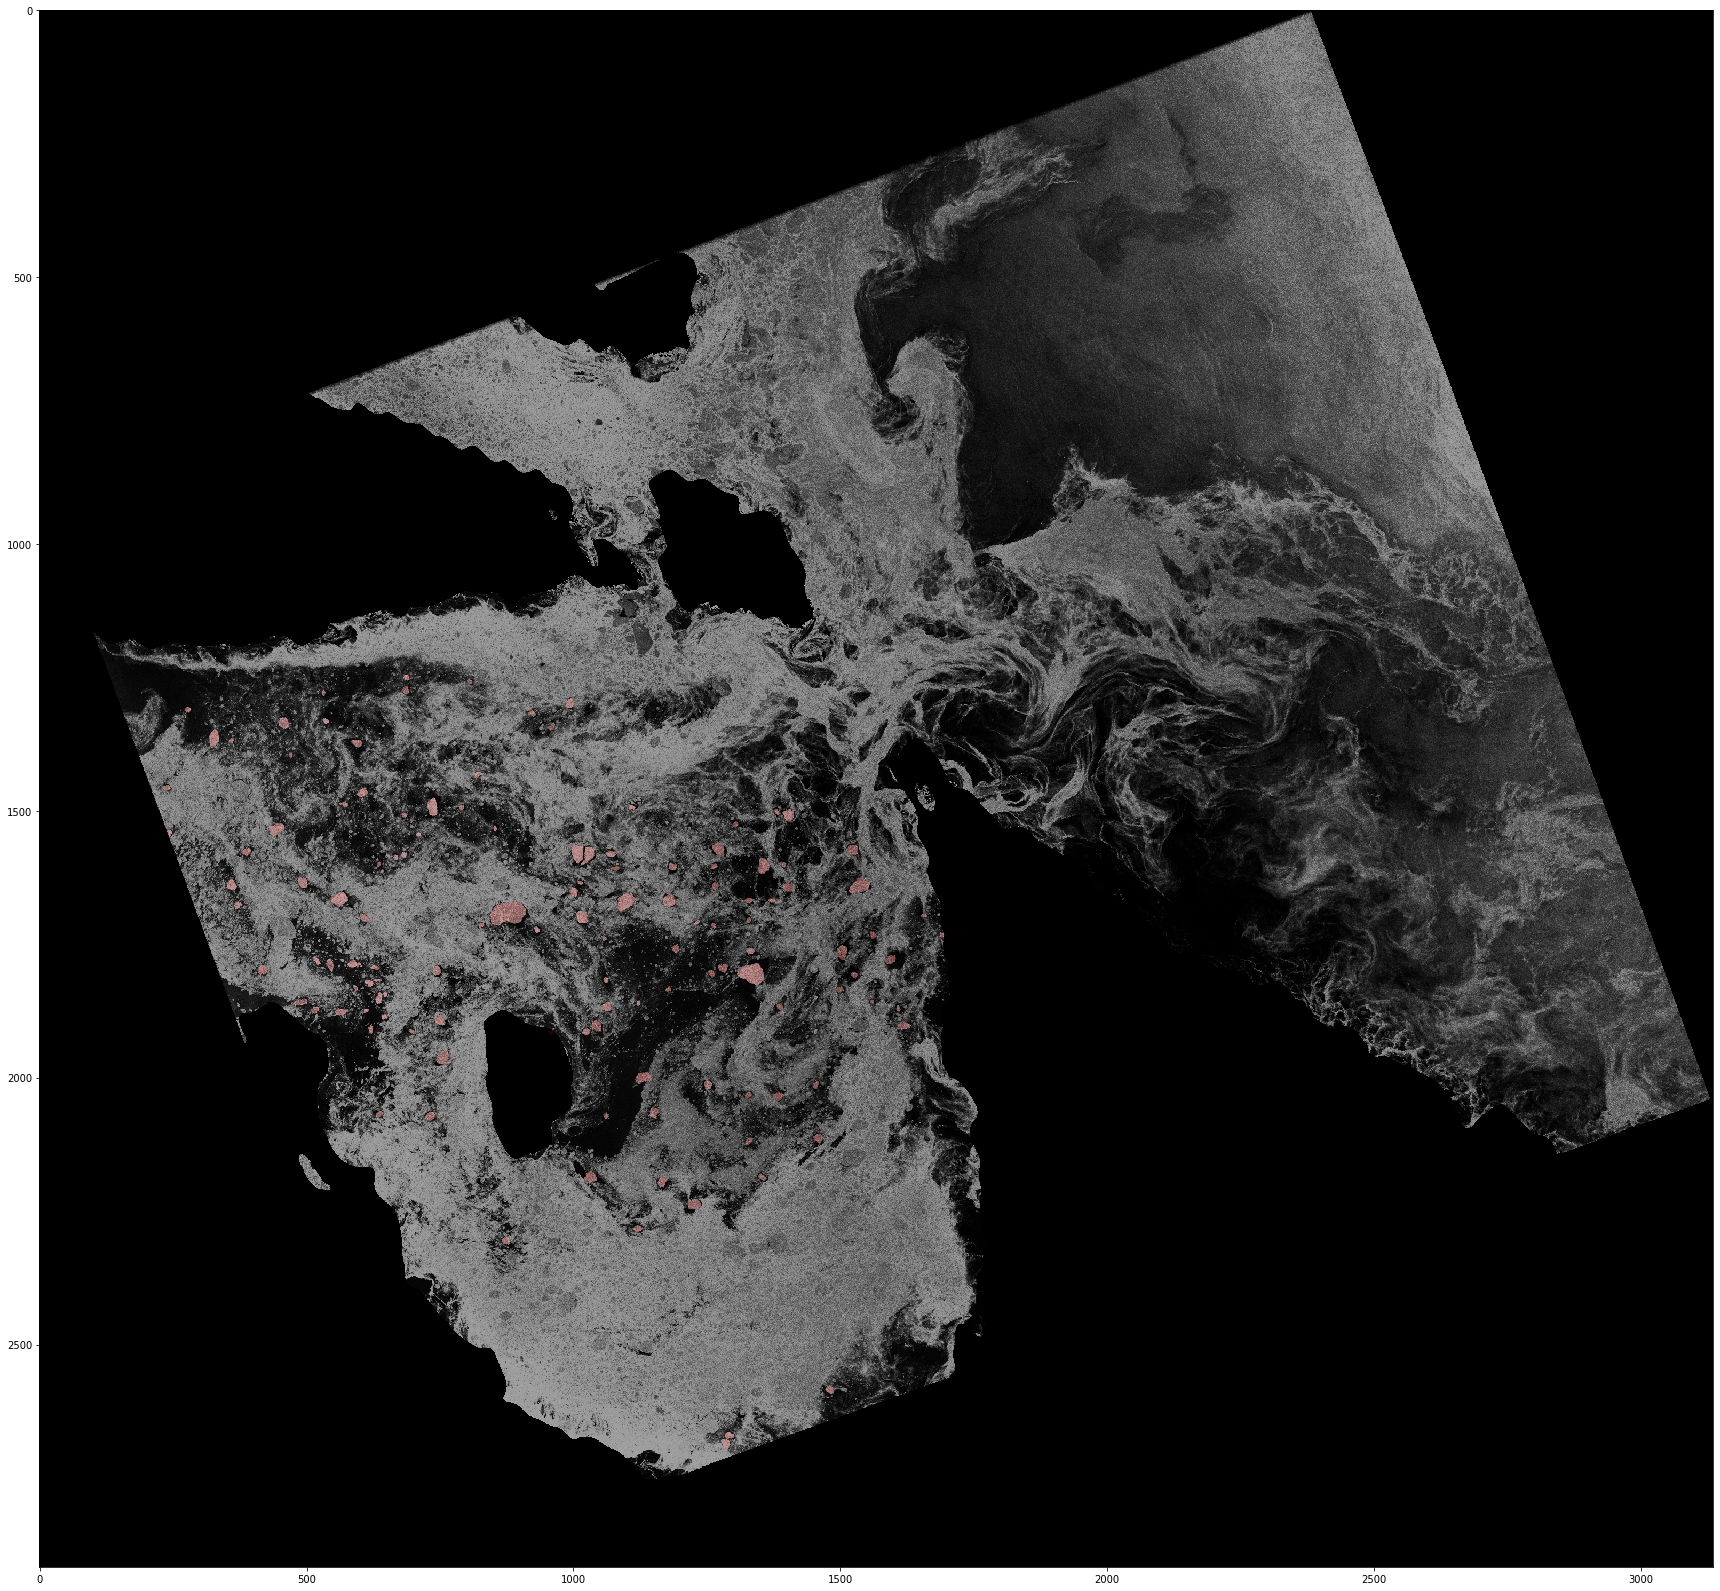

In [23]:
plt.figure(figsize=(30,30))
plt.imshow(floe_mask)
plt.imshow(land_masked,alpha=0.65, cmap = 'gray')
plt.savefig('/home/muzik999/Desktop/IMAGE_FORPAPER/land_floe_masked.png' )